In [720]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [721]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import math

from utils import modeling 
from utils import analysis_pipeline

In [722]:
# sample1 = modeling.sample(0,1,2)
# sample2 = modeling.sample(1,1,2)
# print(sample1,sample2)

In [723]:
# decision1 = modeling.decision(sample1,0.5)
# decision2 = modeling.decision(sample2,0.5)
# print(decision1,decision2)

In [724]:
# print(modeling.accuracy([0,0],decision1))
# print(modeling.accuracy([1,1],decision2))

In [725]:
# ground_truth = [2,1]
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0,1,2),0.4)))
# print(modeling.accuracy(ground_truth,modeling.decision(modeling.sample(0.5,1,2),0.4)))

In [726]:
set_sizes = np.random.randint(3,6,2000)
df = pd.DataFrame(set_sizes, columns=['set_size'])
df


,set_size
0,4
1,5
2,3
3,3
4,4
...,...
1995,5
1996,5
1997,3
1998,5


In [727]:
stimulus = []
for (row_index,row_data) in df.iterrows():
    stimulus.append(modeling.generate_stim(row_data['set_size']))

df['stim'] = stimulus

In [728]:
mean = []
for (row_index,row_data) in df.iterrows():
    mean.append(modeling.generate_mean_set(row_data['set_size']))

df['mean'] = mean

In [729]:
cue = []
for (row_index,row_data) in df.iterrows():
    cue.append(modeling.generate_cue(row_data['stim']))

df['cue'] = cue

In [730]:
sample = []
for (row_index,row_data) in df.iterrows():
    sample.append(modeling.generate_sample(row_data['mean'],0.4))

df['sample'] = sample

In [731]:
decision = []
guessing = []
for (row_index,row_data) in df.iterrows():
    if row_data['sample'] < 0.1:
        guessing.append(1)
    else:
        guessing.append(0)
    decision.append(modeling.decision_random(row_data['stim'],row_data['sample'],row_data['cue'],0.1))

df['decision'] = decision
df['guessing'] = guessing

<Axes: ylabel='Frequency'>

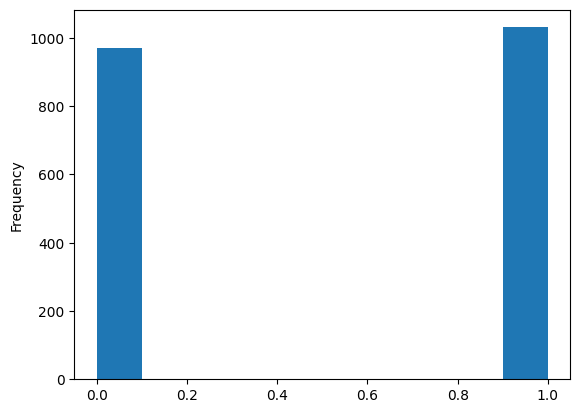

In [732]:
df['guessing'].plot(kind="hist")

In [733]:
df['decision_rad'] = analysis_pipeline.rad_convert(df['decision'])

In [734]:
normalized_decision = []

for (row_index,row_data) in df.iterrows():
    normalized_decision.append(modeling.normalize_decision(row_data['decision_rad']))

df['normalized_decision'] = normalized_decision

In [735]:
stim_rad = []

for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim']:
        buffer.append(analysis_pipeline.rad_convert(value))
    stim_rad.append(buffer)

df['stim_rad'] =  stim_rad

In [736]:
choice = []
for (row_index,row_data) in df.iterrows():
    choice.append(modeling.find_stim_choice(row_data['stim_rad'],row_data['normalized_decision']))
    
df['choice'] = choice

In [737]:
accuracy = []
for (row_index,row_data) in df.iterrows():
    accuracy.append(modeling.generate_accuracy(row_data['cue'],row_data['choice']))
    
df['correct'] = accuracy

In [738]:
distances = []
for (row_index,row_data) in df.iterrows():
    buffer = []
    for value in row_data['stim_rad']:
        buffer.append(analysis_pipeline.find_angular_dist(value,row_data['normalized_decision']))

    distances.append(buffer)
    closest_choice = distances.index(min(distances))
    
df['distances'] = distances

# Plotting
Here I'm plotting

In [739]:
df.head(100)

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,distances
0,4,"[0.7971479717262151, 0.9478679345057687, 0.895...",0.06250,0,0.643199,0.796373,0,5.003758,5.003758,"[5.008628423598163, 5.955629879233308, 5.62482...",0.0,1,"[-0.00487009786480197, -0.9518715534999478, -0..."
1,5,"[0.8956707636573121, 0.8870479875680379, 0.250...",0.03125,3,-0.067940,0.583153,1,3.664057,3.664057,"[5.627665382281943, 5.573486882250716, 1.57669...",1.0,0,"[-1.9636082617013302, -1.9094297616701028, 2.0..."
2,3,"[0.0541543607325321, 0.2843965378159309, 0.137...",0.12500,2,0.143245,0.137592,0,0.864518,0.864518,"[0.34026188367434884, 1.7869161478178004, 0.86...",2.0,1,"[0.5242560812812269, -0.9223981828622246, 0.00..."
3,3,"[0.06748027288687886, 0.40235299887226184, 0.2...",0.12500,0,0.132249,0.066940,0,0.420597,0.420597,"[0.4239910591273062, 2.52805845081384, 1.52292...",0.0,1,"[-0.003394145251318814, -2.1074615369378527, -..."
4,4,"[0.13501677931838374, 0.18215310017530695, 0.6...",0.06250,0,0.104177,0.134691,0,0.846292,0.846292,"[0.8483354440359774, 1.1445016826787, 3.940179...",0.0,1,"[-0.00204393745485687, -0.2982101760975795, -3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,"[0.24045915920658345, 0.8790349445687597, 0.13...",0.03125,3,0.255711,0.753131,0,4.732060,4.732060,"[1.5108494561035621, 5.523139448211853, 0.8612...",3.0,1,"[-3.0619744892314484, -0.7910791741601528, -2...."
96,5,"[0.9585224545543601, 0.2076053763869724, 0.447...",0.03125,1,-0.263537,0.223205,1,1.402437,1.402437,"[6.022574203057668, 1.3044230506061127, 2.8105...",1.0,1,"[1.6630480668180958, 0.09801391209006494, -1.4..."
97,3,"[0.6546167160073688, 0.12810224357924627, 0.92...",0.12500,2,-0.005876,0.573194,1,3.601482,3.601482,"[4.113078131851651, 0.8048901346738606, 5.7869...",0.0,0,"[-0.5115958351849139, 2.7965921619928764, -2.1..."
98,3,"[0.7856003928582287, 0.6812557387217707, 0.176...",0.12500,2,0.471333,0.178148,0,1.119336,1.119336,"[4.936072845721333, 4.280456047968404, 1.11206...",2.0,1,"[2.4664480285813895, 3.1220648263343183, 0.007..."


<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

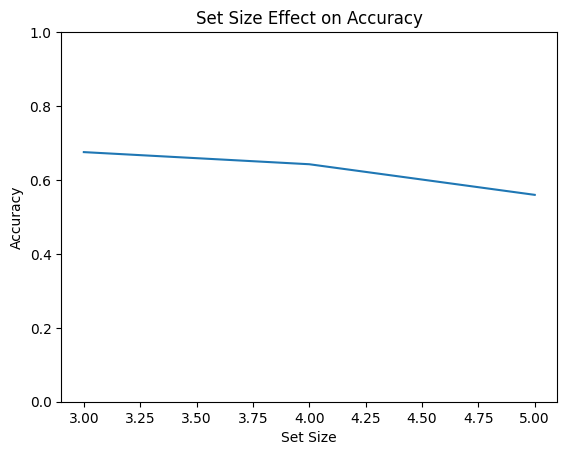

In [740]:
df.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy', ylim=[0,1])

In [741]:
ang_dist = []
for (row_index,row_data) in df.iterrows():
    ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['cue']],row_data['decision_rad']))
    
df['precision_difference_0'] = ang_dist

In [742]:
df

,set_size,stim,mean,cue,sample,decision,guessing,decision_rad,normalized_decision,stim_rad,choice,correct,distances,precision_difference_0
0,4,"[0.7971479717262151, 0.9478679345057687, 0.895...",0.06250,0,0.643199,0.796373,0,5.003758,5.003758,"[5.008628423598163, 5.955629879233308, 5.62482...",0.0,1,"[-0.00487009786480197, -0.9518715534999478, -0...",-0.004870
1,5,"[0.8956707636573121, 0.8870479875680379, 0.250...",0.03125,3,-0.067940,0.583153,1,3.664057,3.664057,"[5.627665382281943, 5.573486882250716, 1.57669...",1.0,0,"[-1.9636082617013302, -1.9094297616701028, 2.0...",-2.728825
2,3,"[0.0541543607325321, 0.2843965378159309, 0.137...",0.12500,2,0.143245,0.137592,0,0.864518,0.864518,"[0.34026188367434884, 1.7869161478178004, 0.86...",2.0,1,"[0.5242560812812269, -0.9223981828622246, 0.00...",0.002486
3,3,"[0.06748027288687886, 0.40235299887226184, 0.2...",0.12500,0,0.132249,0.066940,0,0.420597,0.420597,"[0.4239910591273062, 2.52805845081384, 1.52292...",0.0,1,"[-0.003394145251318814, -2.1074615369378527, -...",-0.003394
4,4,"[0.13501677931838374, 0.18215310017530695, 0.6...",0.06250,0,0.104177,0.134691,0,0.846292,0.846292,"[0.8483354440359774, 1.1445016826787, 3.940179...",0.0,1,"[-0.00204393745485687, -0.2982101760975795, -3...",-0.002044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5,"[0.352658517374955, 0.18372714871198903, 0.269...",0.03125,2,-0.320356,0.715017,1,4.492582,4.492582,"[2.2158188148220543, 1.1543917213171684, 1.694...",3.0,0,"[2.2767630758829536, -2.9449951377917465, 2.79...",2.798061
1996,5,"[0.6580275639462675, 0.47364236447465735, 0.62...",0.03125,4,0.168131,0.839545,0,5.275017,5.275017,"[4.134509121506364, 2.9759827453249654, 3.9192...",4.0,1,"[1.140507915863875, 2.299034292045273, 1.35577...",-0.009169
1997,3,"[0.132156753690295, 0.9330044100634862, 0.6643...",0.12500,2,-0.567649,0.188690,1,1.185575,1.185575,"[0.8303653730314131, 5.862239600844655, 4.1744...",0.0,0,"[0.3552093101733891, 1.6065203895397335, -2.98...",-2.988888
1998,5,"[0.8483038644051938, 0.40062805419324155, 0.42...",0.03125,3,0.668474,0.538608,0,3.384172,3.384172,"[5.330050376854378, 2.517220303750922, 2.69937...",3.0,1,"[-1.9458785478475362, 0.8669515252559195, 0.68...",0.001537


<Axes: title={'center': 'Set Size Effect on Precision'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

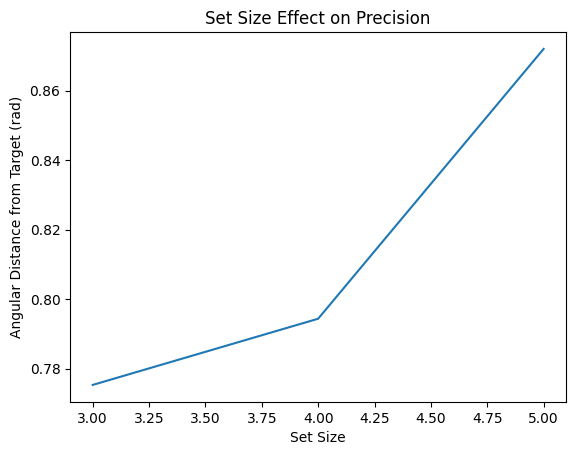

In [743]:
df['precision_difference_0_abs'] = df['precision_difference_0'].abs()

df.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Precision')

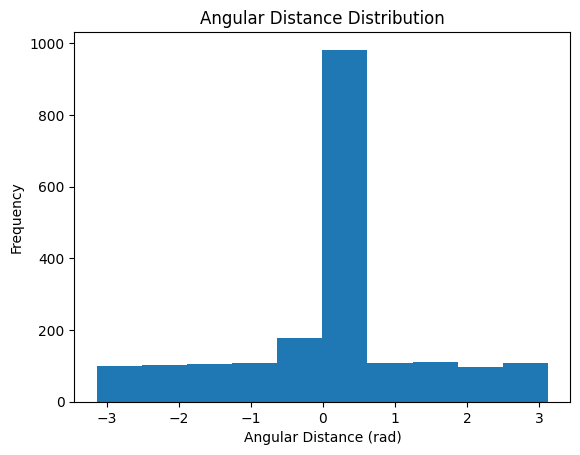

In [744]:
analysis_pipeline.plot_hist('precision_difference_0',df,'Angular Distance (rad)','Angular Distance Distribution')

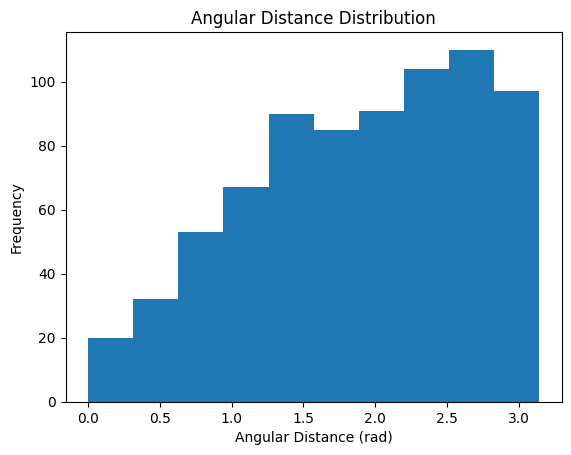

In [745]:
incorrect_df = df[df['correct'] == 0]
analysis_pipeline.plot_hist('precision_difference_0_abs',incorrect_df,'Angular Distance (rad)','Angular Distance Distribution')

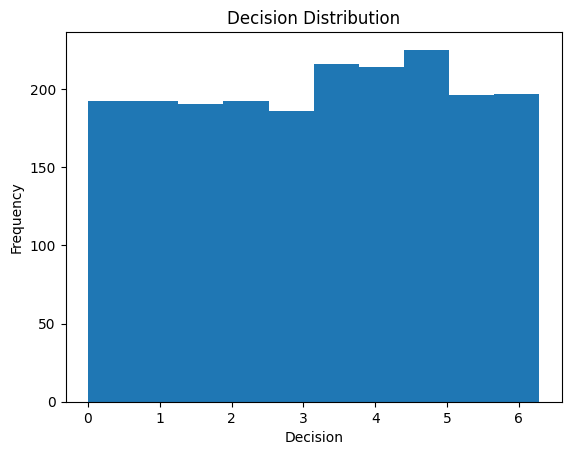

In [746]:
analysis_pipeline.plot_hist('normalized_decision',df,'Decision','Decision Distribution')

In [747]:
choice = []
for (row_index,row_data) in df.iterrows():
    if math.isnan(row_data['choice']) == True:
        choice.append(row_data['choice'])
    else:
        choice.append(int(row_data['choice']))

df['choice'] = choice
print(choice)

[0, 1, 2, 0, 0, 2, 0, 4, 1, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 0, 1, 1, 3, 1, 0, 2, 2, 0, 4, 3, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 3, 4, 4, 4, 1, 0, 2, 3, 3, 1, 1, 1, 0, 0, 3, 0, 3, 1, 2, 1, 2, 1, 1, 2, 0, nan, 3, 2, 3, 3, 3, 2, 2, 3, 0, 0, 0, 4, 1, 3, 2, 0, 1, 2, 3, 0, 2, 0, 1, 3, 1, 2, 1, 3, 1, 0, 2, 0, 0, 0, 3, 1, 2, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 0, 1, 2, 0, 2, 3, 2, nan, 4, 3, 1, 1, 4, 0, 2, 0, 1, 0, 2, 3, 1, 1, 1, 2, 1, 0, 3, 3, 0, 0, 3, 4, 0, 2, 0, 0, 2, 1, 2, 2, 2, 4, 0, 3, 2, 3, 2, 0, 2, 2, 3, 2, 0, 2, 2, 3, 1, 1, 4, 1, 2, 3, 1, 4, 1, 0, 0, 1, 1, 0, 0, 4, 1, 0, 0, 0, 2, 0, 1, 3, 1, 2, 2, 0, 3, 4, 1, 1, 1, 0, 2, 1, 1, 2, nan, 0, 1, 2, 3, 1, 0, 1, 1, 0, 3, 3, 0, 3, 1, 2, 2, 2, 0, 2, 0, 2, 1, 3, 1, 1, 1, 2, 2, 4, 0, 4, 1, 2, 0, 1, 0, 3, 1, 2, 0, 0, 2, 0, 0, 3, 0, 0, 2, 1, 1, 3, 1, 3, 3, 0, 2, 4, 0, 0, 0, 3, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 4, 1, 2, 3, 3, 2, 0, 2, 0, 4, 2, 2, 1, 2, 3, 4, 3, 0, 1, 2, 1, 2, nan, 1, 2, 1, 3, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 3, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 0

In [748]:
# ang_dist = []
# for (row_index,row_data) in df.iterrows():
#     if math.isnan(row_data['choice']):
#         ang_dist.append(None)
#     else:
#         ang_dist.append(analysis_pipeline.find_angular_dist(row_data['stim_rad'][row_data['choice']],row_data['decision_rad']))
# df['precision_difference_choice'] = ang_dist

# Set Size Random Model Plotting

In [749]:
df_new = modeling.set_create_df(1000,0.4)

In [750]:
df_random = modeling.run_model_random(df_new,2)

In [751]:
df_random = modeling.model_analysis(df_random)

<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

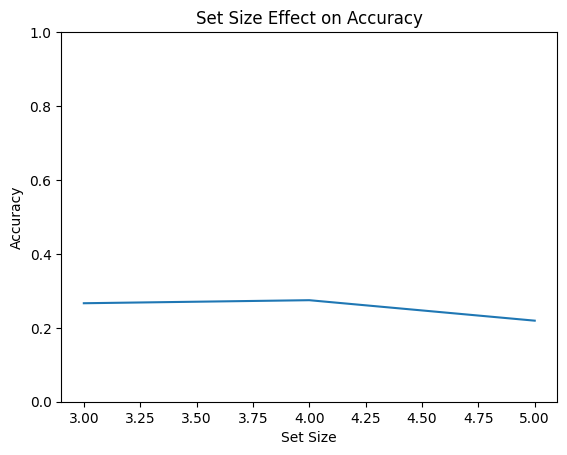

In [752]:
df_random.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Set Size Effect on Error'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

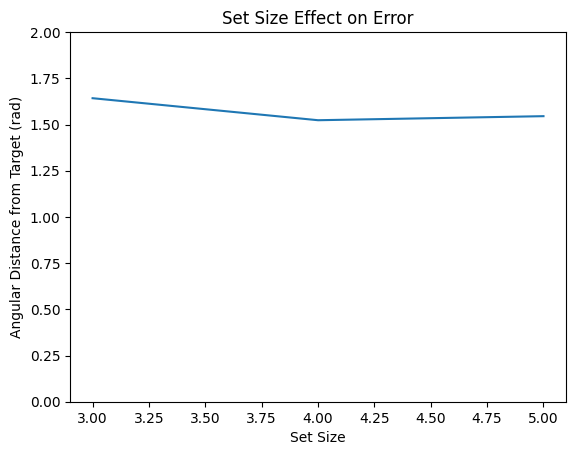

In [753]:
df_random.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Error',ylim=[0,2])

<Axes: title={'center': 'Set Size Effect on Precision for Incorrect Choice'}, xlabel='Set Size', ylabel='Angular Distance from Incorrect Choice (rad)'>

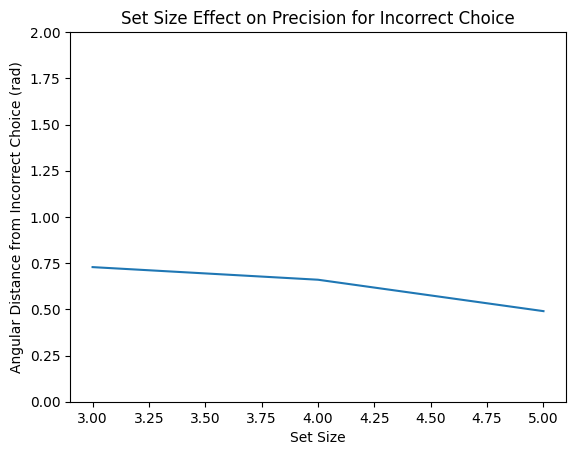

In [754]:
incorrect_df_random = df_random[df_random['correct'] == 0]
incorrect_df_random.groupby('set_size').precision_difference_choice_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Set Size Effect on Precision for Incorrect Choice',ylim=[0,2])

In [755]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils import get_trial_dataframe
from utils import get_trial_paths
from utils import analysis_pipeline

# Set Size Confused Model Plotting

In [756]:
df_confused = modeling.run_model_confused(df_new,2)

In [757]:
df_confused = modeling.model_analysis(df_confused)

<Axes: title={'center': 'Set Size Effect on Accuracy'}, xlabel='Set Size', ylabel='Accuracy'>

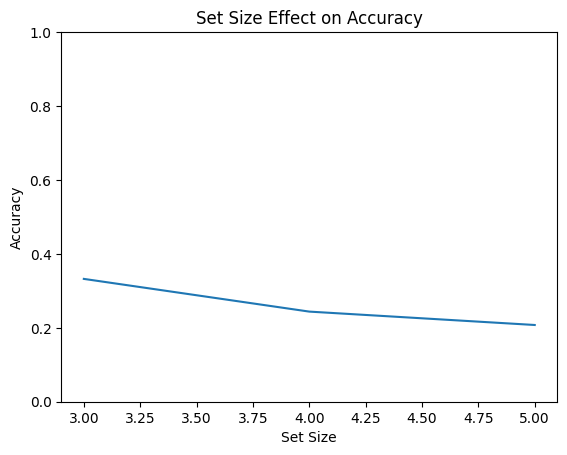

In [758]:
df_confused.groupby('set_size').correct.mean().plot(xlabel= 'Set Size', ylabel= 'Accuracy', title='Set Size Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Set Size Effect on Precision'}, xlabel='Set Size', ylabel='Angular Distance from Target (rad)'>

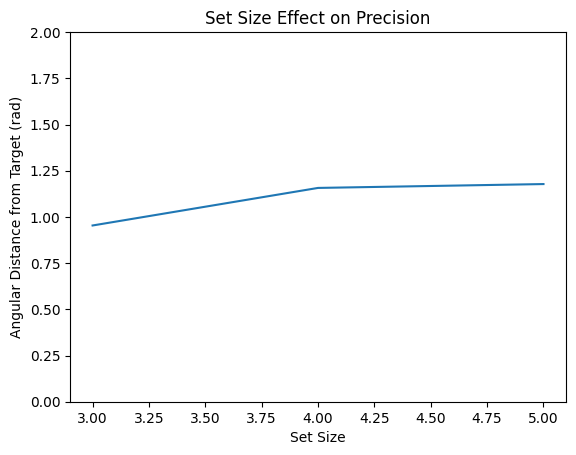

In [759]:
df_confused.groupby('set_size').precision_difference_0_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Target (rad)', title='Set Size Effect on Precision',ylim=[0,2])

<Axes: title={'center': 'Set Size Effect on Precision for Incorrect Choice'}, xlabel='Set Size', ylabel='Angular Distance from Incorrect Choice (rad)'>

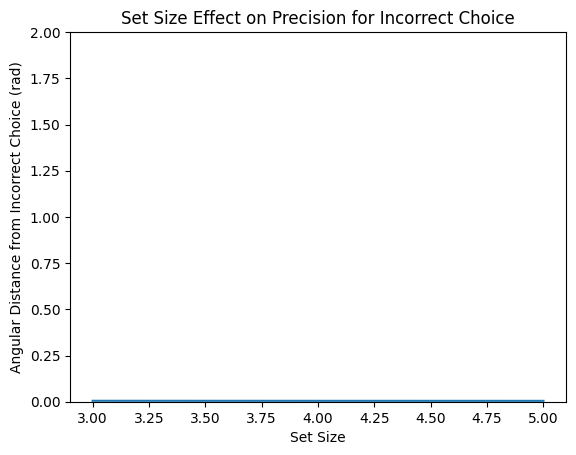

In [760]:
incorrect_df_confused = df_confused[df_confused['correct'] == 0]
incorrect_df_confused.groupby('set_size').precision_difference_choice_abs.mean().plot(xlabel= 'Set Size', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Set Size Effect on Precision for Incorrect Choice',ylim=[0,2])

# Set Size Summary

Text(0.5, 1.0, 'Set Size Effect on Accuracy')

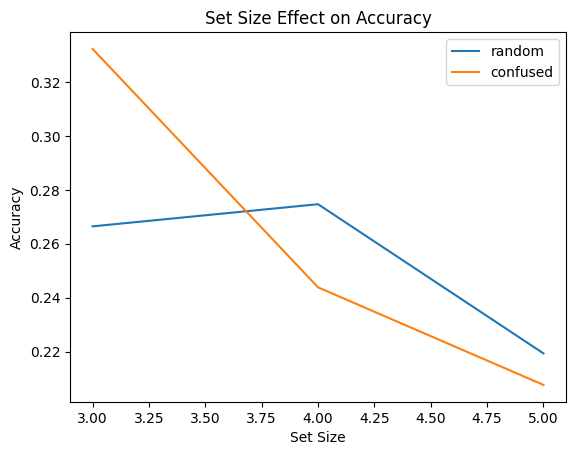

In [761]:
fig,ax = plt.subplots()
ax.plot(df_random.groupby('set_size').correct.mean(), label= 'random')
ax.plot(df_confused.groupby('set_size').correct.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Accuracy')
plt.title('Set Size Effect on Accuracy')

Text(0.5, 1.0, 'Set Size Effect on Error')

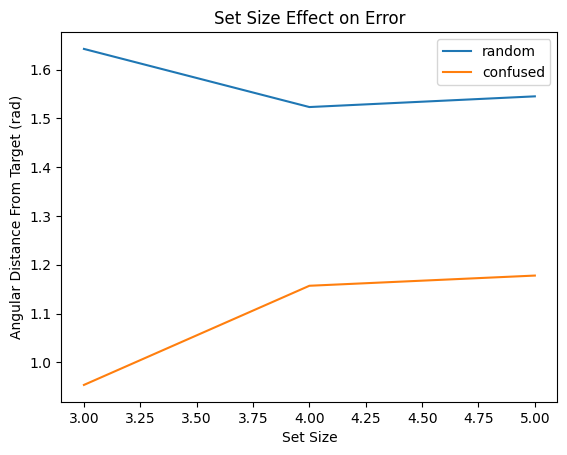

In [762]:
fig,ax = plt.subplots()
ax.plot(df_random.groupby('set_size').precision_difference_0_abs.mean(), label= 'random')
ax.plot(df_confused.groupby('set_size').precision_difference_0_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Distance From Target (rad)')
plt.title('Set Size Effect on Error')

Text(0.5, 1.0, 'Difference in Guessing Models')

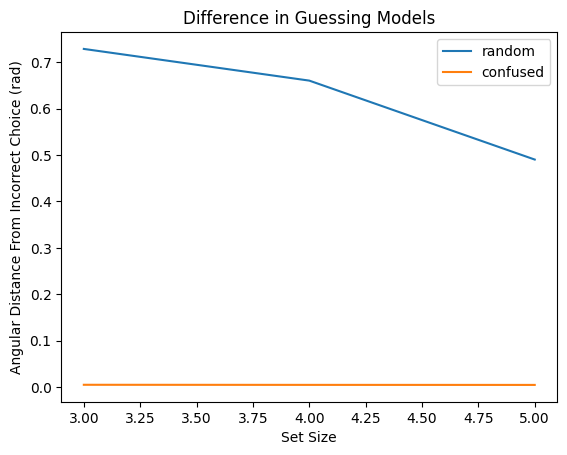

In [763]:
fig,ax = plt.subplots()
ax.plot(incorrect_df_random.groupby('set_size').precision_difference_choice_abs.mean(), label= 'random')
ax.plot(incorrect_df_confused.groupby('set_size').precision_difference_choice_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Set Size')
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Guessing Models')

# Delay Interval Random Model Plotting

In [764]:
df_delay = modeling.delay_create_df(1000,0.4)

In [765]:
df_delay_random = modeling.run_model_random(df_delay,2)

In [766]:
df_delay_random = modeling.model_analysis(df_delay_random)

<Axes: title={'center': 'Delay Time Effect on Accuracy'}, xlabel='Delay Time (s)', ylabel='Accuracy'>

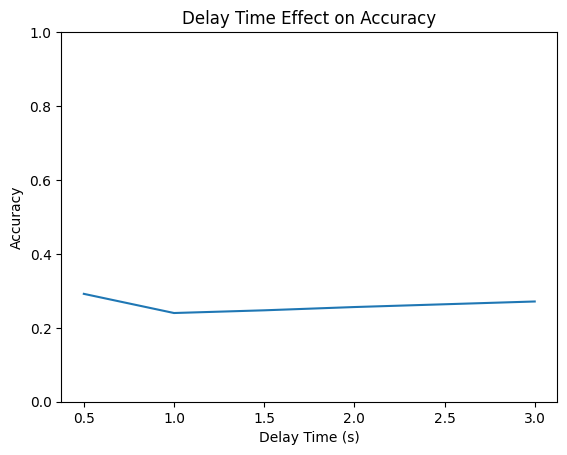

In [767]:
df_delay_random.groupby('delay_s').correct.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Accuracy', title='Delay Time Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Delay Time Effect on Precision'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Target abe(rad)'>

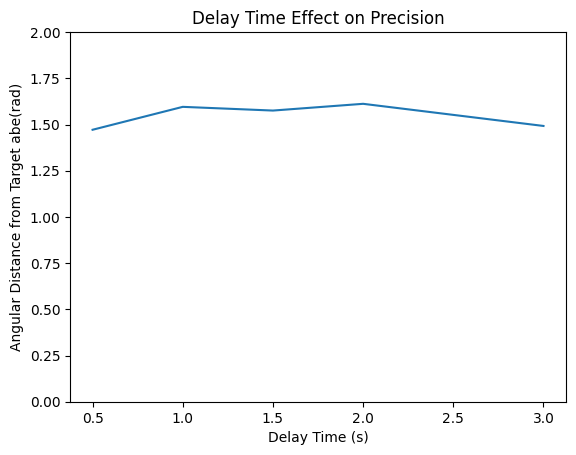

In [768]:
df_delay_random.groupby('delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Target abe(rad)', title='Delay Time Effect on Precision',ylim=[0,2])

<Axes: title={'center': 'Delay Time Effect on Precision for Incorrect Choice'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Incorrect Choice (rad)'>

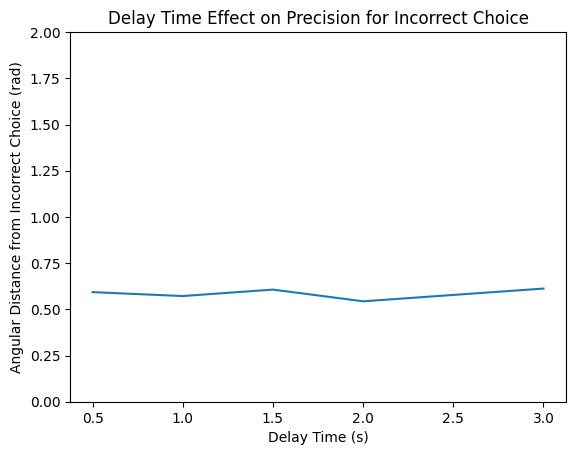

In [769]:
incorrect_df_delay_random = df_delay_random[df_delay_random['correct'] == 0]
incorrect_df_delay_random.groupby('delay_s').precision_difference_choice_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Delay Time Effect on Precision for Incorrect Choice',ylim=[0,2])

# Delay Interval Confused Model Plotting

In [770]:
df_delay_confused = modeling.run_model_confused(df_delay,2)

In [771]:
df_delay_confused = modeling.model_analysis(df_delay_confused)

<Axes: title={'center': 'Delay Time Effect on Accuracy'}, xlabel='Delay Time (s)', ylabel='Accuracy'>

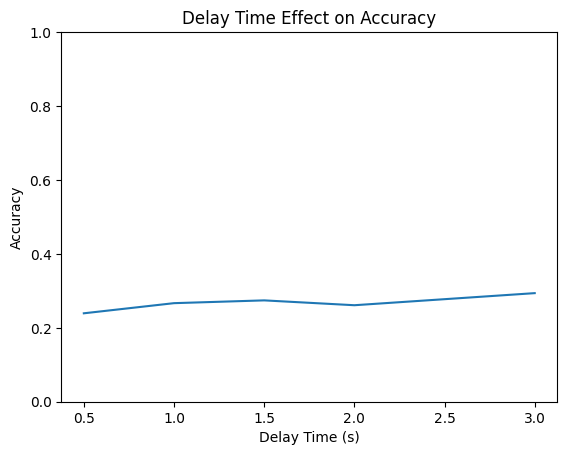

In [772]:
df_delay_confused.groupby('delay_s').correct.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Accuracy', title='Delay Time Effect on Accuracy', ylim=[0,1])

<Axes: title={'center': 'Delay Time Effect on Precision'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Target abe(rad)'>

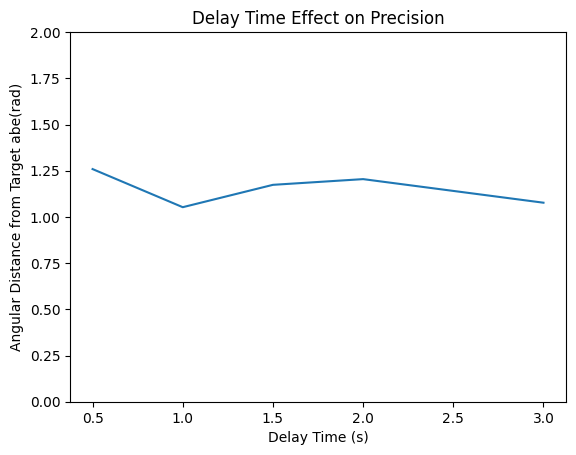

In [773]:
df_delay_confused.groupby('delay_s').precision_difference_0_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Target abe(rad)', title='Delay Time Effect on Precision',ylim=[0,2])

<Axes: title={'center': 'Delay Time Effect on Precision for Incorrect Choice'}, xlabel='Delay Time (s)', ylabel='Angular Distance from Incorrect Choice (rad)'>

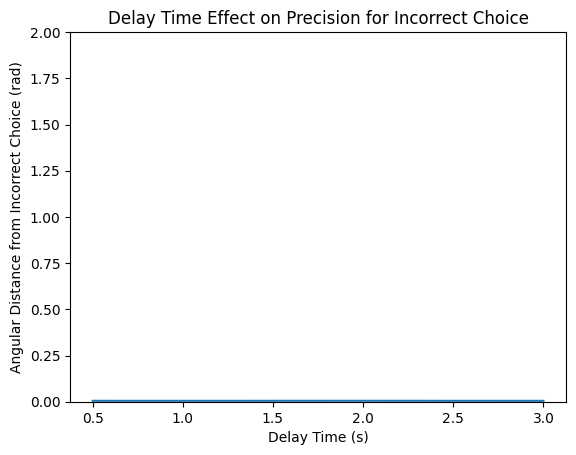

In [774]:
incorrect_df_delay_confused = df_delay_confused[df_delay_confused['correct'] == 0]
incorrect_df_delay_confused.groupby('delay_s').precision_difference_choice_abs.mean().plot(xlabel= 'Delay Time (s)', ylabel= 'Angular Distance from Incorrect Choice (rad)', title='Delay Time Effect on Precision for Incorrect Choice',ylim=[0,2])

# 

Text(0.5, 1.0, 'Delay Time Effect on Accuracy')

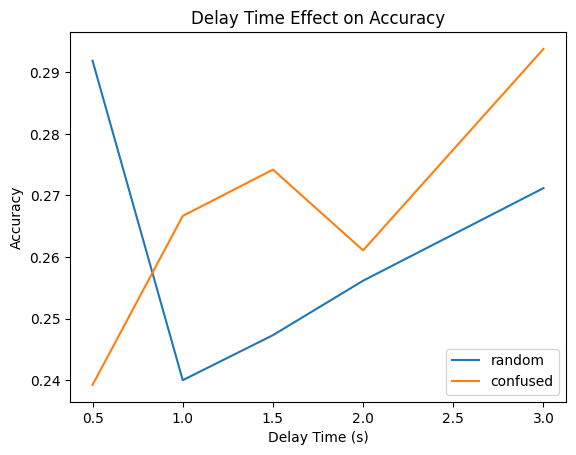

In [775]:
fig,ax = plt.subplots()
ax.plot(df_delay_random.groupby('delay_s').correct.mean(), label= 'random')
ax.plot(df_delay_confused.groupby('delay_s').correct.mean(),label= 'confused')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Accuracy')
plt.title('Delay Time Effect on Accuracy')

Text(0.5, 1.0, 'Delay Time Effect on Error')

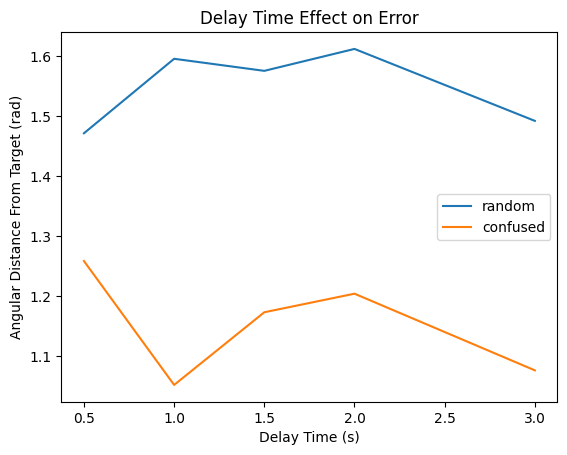

In [776]:
fig,ax = plt.subplots()
ax.plot(df_delay_random.groupby('delay_s').precision_difference_0_abs.mean(), label= 'random')
ax.plot(df_delay_confused.groupby('delay_s').precision_difference_0_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Distance From Target (rad)')
plt.title('Delay Time Effect on Error')

Text(0.5, 1.0, 'Difference in Guessing Models')

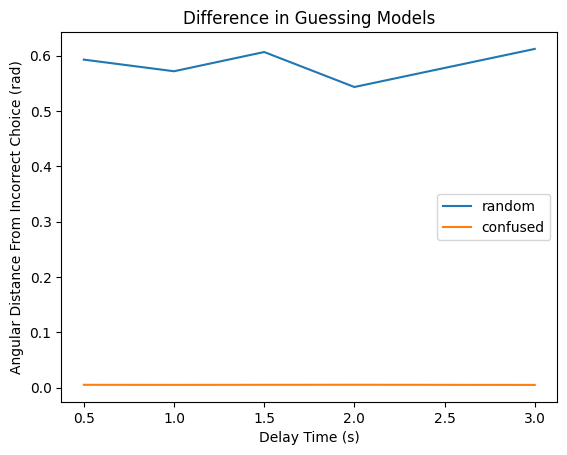

In [777]:
fig,ax = plt.subplots()
ax.plot(incorrect_df_delay_random.groupby('delay_s').precision_difference_choice_abs.mean(), label= 'random')
ax.plot(incorrect_df_delay_confused.groupby('delay_s').precision_difference_choice_abs.mean(),label= 'confused')
plt.legend()
plt.xlabel('Delay Time (s)')
plt.ylabel('Angular Distance From Incorrect Choice (rad)')
plt.title('Difference in Guessing Models')